In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 获取数据集

In [3]:
df = pd.read_excel(r'/Users/lawrencezhang/Desktop/RFM.xlsx')
df.head()

,平台,店铺名称,买家昵称,付款时间,发货时间,结束时间,订单状态,实付金额,邮费,省份,城市,购买数量
0,淘宝平台,let's_go_cavs,emoximoxi_n,2018-04-30 21:49:43,2018-05-02 16:14:43,2018-05-07 08:41:14,交易成功,144.45,0,上海,上海市,1
1,淘宝平台,let's_go_cavs,9飞天小猫10,2018-04-30 21:42:58,NaT,2018-05-02 13:49:40,付款以后用户退款成功，交易自动关闭,168.95,0,河南省,郑州市,2
2,淘宝平台,let's_go_cavs,之初雄,2018-04-30 20:22:51,2018-05-01 14:58:42,2018-05-11 14:58:55,交易成功,24.50,0,广东省,肇庆市,1
3,淘宝平台,let's_go_cavs,uchuejn,2018-04-30 20:15:58,2018-05-01 14:58:42,2018-05-11 14:59:05,交易成功,49.00,0,江苏省,淮安市,2
4,淘宝平台,let's_go_cavs,8ruoxi7,2018-04-30 20:08:05,NaT,2018-05-01 13:51:58,付款以后用户退款成功，交易自动关闭,49.45,0,湖北省,武汉市,2


# 筛选有效数据

In [4]:
display("剔除之前共有:" + str(df.shape[0]) + "条记录");
df = df[df["订单状态"] == "交易成功"]
display("剔除之后共有:" + str(df.shape[0]) + "条记录");

'剔除之前共有:28833条记录'

'剔除之后共有:27793条记录'

# 选取有效字段

In [6]:
df

,平台,店铺名称,买家昵称,付款时间,发货时间,结束时间,订单状态,实付金额,邮费,省份,城市,购买数量
0,淘宝平台,let's_go_cavs,emoximoxi_n,2018-04-30 21:49:43,2018-05-02 16:14:43,2018-05-07 08:41:14,交易成功,144.45,0,上海,上海市,1
2,淘宝平台,let's_go_cavs,之初雄,2018-04-30 20:22:51,2018-05-01 14:58:42,2018-05-11 14:58:55,交易成功,24.50,0,广东省,肇庆市,1
3,淘宝平台,let's_go_cavs,uchuejn,2018-04-30 20:15:58,2018-05-01 14:58:42,2018-05-11 14:59:05,交易成功,49.00,0,江苏省,淮安市,2
5,淘宝平台,let's_go_cavs,0蓝蝶201112,2018-04-30 18:52:34,2018-05-01 14:58:41,2018-05-03 22:12:36,交易成功,24.50,0,北京,北京市,1
6,淘宝平台,let's_go_cavs,agaoyunjn,2018-04-30 18:40:19,2018-05-02 16:14:43,2018-05-12 16:15:07,交易成功,144.45,0,江苏省,无锡市,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28828,淘宝平台,let's_go_cavs,m姹紫嫣红m,2017-11-01 09:01:35,2017-11-01 13:49:06,2017-11-11 13:49:19,交易成功,24.50,0,浙江省,宁波市,1
28829,淘宝平台,let's_go_cavs,萝污萌莉,2017-11-01 07:48:48,2017-11-01 13:49:06,2017-11-03 22:45:12,交易成功,26.50,8,山东省,东营市,1
28830,淘宝平台,let's_go_cavs,2徐杰09,2017-11-01 07:32:32,2017-11-01 13:38:09,2017-11-10 19:32:54,交易成功,24.50,0,山东省,威海市,1
28831,淘宝平台,let's_go_cavs,0cyb1992,2017-11-01 00:59:54,2017-11-01 11:55:03,2017-11-11 10:17:36,交易成功,24.50,0,广东省,广州市,1


In [7]:
df1=df[['买家昵称','付款时间','实付金额']]
df1.index=np.arange(df1.shape[0])
display(df1.shape)
display(df1.head())

(27793, 3)

,买家昵称,付款时间,实付金额
0,emoximoxi_n,2018-04-30 21:49:43,144.45
1,之初雄,2018-04-30 20:22:51,24.50
2,uchuejn,2018-04-30 20:15:58,49.00
3,0蓝蝶201112,2018-04-30 18:52:34,24.50
4,agaoyunjn,2018-04-30 18:40:19,144.45


# 缺失值处理

In [8]:
df1.isnull().sum(axis=0)

买家昵称    0
付款时间    0
实付金额    0
dtype: int64

# 计算RFM数值

In [20]:
df1['付款时间']=pd.to_datetime(df1['付款时间'])
df1['天数']=(pd.to_datetime('today')-df1['付款时间']).dt.days
display(df1.sample(10))

/Users/lawrencezhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lawrencezhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,买家昵称,付款时间,实付金额,天数
7449,1fyxx_22,2018-01-18 21:01:23,17.000,1153
11233,午洗洗觉,2017-12-19 16:31:39,89.500,1183
14302,ehan,2017-12-18 00:29:07,87.000,1185
18407,9violin89,2017-11-11 22:04:51,4.500,1221
22133,ltingooe,2017-11-11 01:11:58,69.500,1222
12933,宝好宝贝贝,2017-12-18 11:14:00,0.005,1185
5331,5tb316285,2018-03-08 10:05:30,89.500,1105
5841,剑心心,2018-01-31 22:04:17,24.500,1140
10727,hshipingjinu,2017-12-20 12:46:46,129.450,1182
24261,xcherlex,2017-11-11 00:23:53,34.000,1222


In [21]:
df2=pd.pivot_table(df1,index='买家昵称',
                   values=['买家昵称','天数','实付金额'],
                   aggfunc={'买家昵称':'count','天数':'min','实付金额':'sum'})
df2 = df2[['天数','买家昵称','实付金额']]
print(df2)

              天数  买家昵称    实付金额
买家昵称                          
.blue_ram   1197     1  49.450
.christiny  1203     1  22.000
.willn1     1222     1  34.570
.托托m        1222     1  37.475
0000妮       1222     1  13.500
...          ...   ...     ...
龙火师         1196     1  24.500
龙魔鬼女        1183     1  87.000
龟mil宝       1185     2  50.720
！谢鹏逗逼？      1076     1  17.000
～小邱～        1222     1  15.000

[25419 rows x 3 columns]


## R：最近购买距离现在时间
## F：最近购买次数
## M：最近购买金额

In [22]:
df2.columns = ["R","F","M"]
df2.reset_index(inplace=True)
display(df2.shape)
display(df2.head(10))

(25419, 4)

,买家昵称,R,F,M
0,.blue_ram,1197,1,49.450
1,.christiny,1203,1,22.000
2,.willn1,1222,1,34.570
3,.托托m,1222,1,37.475
4,0000妮,1222,1,13.500
5,0009797王,1178,1,94.500
6,000xyx0,1185,1,99.250
7,000米粒儿米粒0,1200,1,24.500
8,00556旭79618,1222,1,23.860
9,00不哭0,1222,1,53.545


# 用户层打分

In [38]:
## compute R Score 
def func1(x):
    if x>=1060and x<1090:
        return 5
    elif x>=1090and x<1120:
        return 4
    elif x>=1120and x<1150:
        return 3
    elif x>=1150and x<1180:
        return 2
    elif x>=1180:
        return 1

## compute F Score 
def func2(x):
    if x>=0and x<2:
        return 1
    elif x>=2and x<3:
        return 2
    elif x>=3and x<4:
        return 3
    elif x>=4and x<5:
        return 4
    elif x>=5:
        return 5

## compute M Score 
def func3(x):
    if x>=0and x<50:
        return 1
    elif x>=50and x<100:
        return 2
    elif x>=100and x<150:
        return 3
    elif x>=150and x<200:
        return 4
    elif x>=200:
        return 5

df2['R-SCORE'] = df2['R'].apply(func1)
df2['F-SCORE'] = df2['F'].apply(func2)
df2['M-SCORE'] = df2['M'].apply(func3)
df2.sample(20)

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE
24179,苜rea蓿,1070,1,94.500,5.0,1,2
3708,1yanyan744,1095,1,24.500,4.0,1,1
18333,yyuanxiaox,1222,2,15.530,1.0,2,1
12998,eclovec4er,1103,1,16.000,4.0,1,1
18418,y空岛空心s,1185,1,7.500,1.0,1,1
23960,而瑀至,1190,1,34.500,1.0,1,1
12334,bannake,1083,1,40.550,5.0,1,1
9826,8lunalun9,1088,1,65.000,5.0,1,2
2162,1chenyijiao0,1222,1,27.500,1.0,1,1
11934,akoumindetaoo,1189,1,24.500,1.0,1,1


# 用户贴标签

## 第一种方法：
### 根据业务场景和业务来分配全重 比如说赋予的权重是3：1：2。

# 第二章方法
## 完全根据单独的RFM标签来计算,将R,F,M Score和各自的平均值进行比较，得到8种客户标签类型

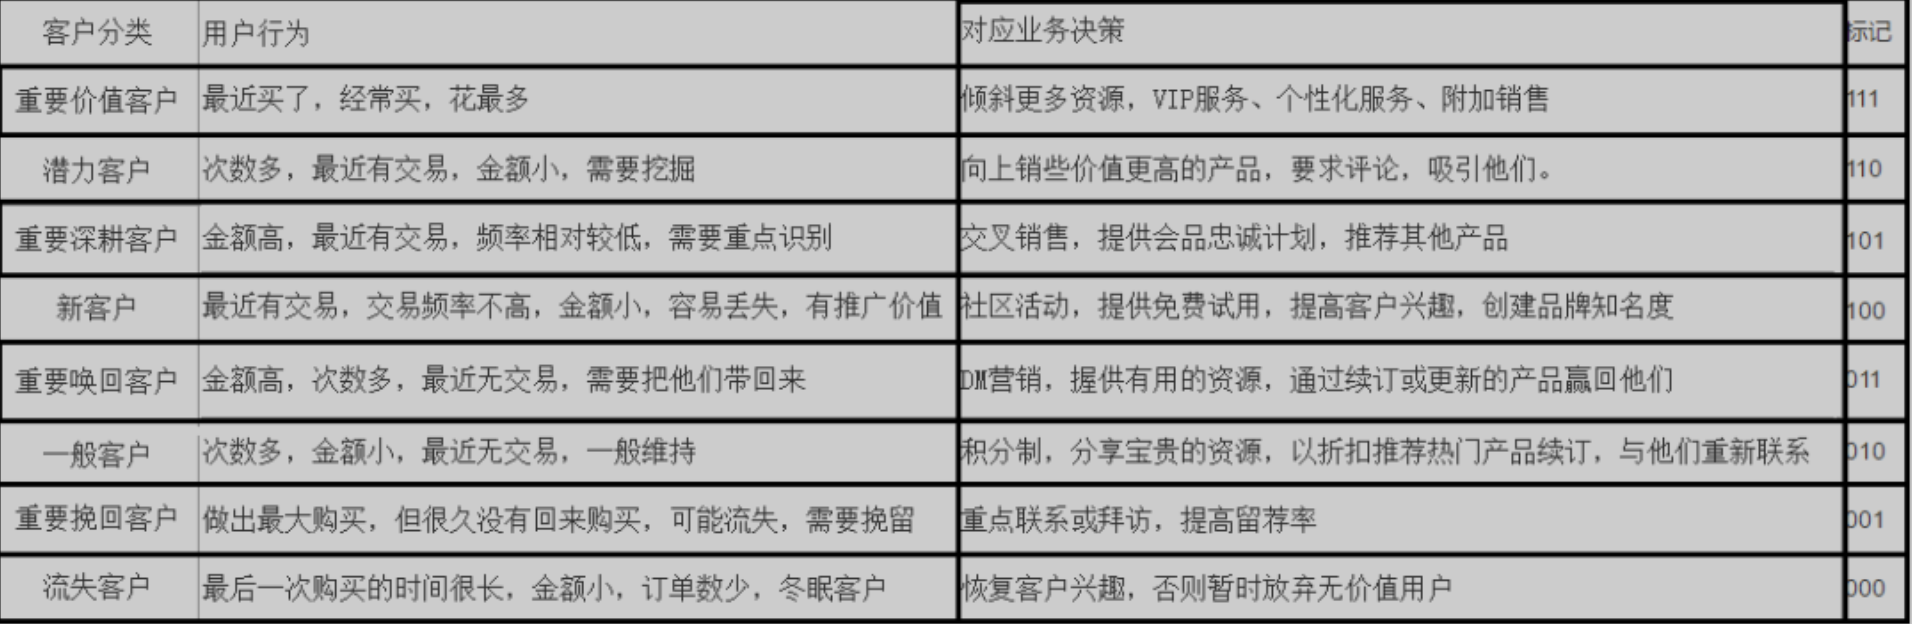

In [39]:
avg_R=df2['R-SCORE'].mean()
avg_F=df2['F-SCORE'].mean()
avg_M=df2['M-SCORE'].mean()
display(avg_R,avg_F,avg_M)

1.9489153534624484

1.0928832762893899

1.6246508517250875

In [40]:
def func1(x):
    if x>avg_R:
        return 1
    else:
        return 0
    
def func2(x):
    if x>avg_F:
        return 1
    else:
        return 0
    
def func3(x):
    if x>avg_M:
        return 1
    else:
        return 0
df2['R-SCORE 是否大于平均值'] = df2['R-SCORE'].apply(func1)
df2['F-SCORE 是否大于平均值'] = df2['F-SCORE'].apply(func1)
df2['M-SCORE 是否大于平均值'] = df2['M-SCORE'].apply(func1)
display(df2.sample(10))

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R-SCORE 是否大于平均值,F-SCORE 是否大于平均值,M-SCORE 是否大于平均值
4261,1梦洁_25,1183,1,68.400,1.0,1,2,0,0,1
12484,ccantry,1221,1,13.630,1.0,1,1,0,0,0
19895,品黛黛屋,1222,1,30.000,1.0,1,1,0,0,0
7511,4t_1488548986586_01,1221,1,13.500,1.0,1,1,0,0,0
9009,7ixix18,1185,1,25.800,1.0,1,1,0,0,0
19773,同小得学,1146,1,144.450,3.0,1,3,1,0,1
69,0barbara21,1185,1,87.000,1.0,1,2,0,0,1
22755,深夜晚圳,1058,1,124.450,NaN,1,3,0,0,1
22619,波安波,1222,1,30.000,1.0,1,1,0,0,0
15270,mnyea,1185,2,75.495,1.0,2,2,0,1,1


In [41]:
def decide_sign(x):
    if x.iloc[0]==1 and x.iloc[1]==1 and x.iloc[2]==1:
        return '重要价值客户'
    elif x.iloc[0]==1 and x.iloc[1]==1 and x.iloc[2]==0:
        return '潜力客户'
    elif x.iloc[0]==1 and x.iloc[1]==0 and x.iloc[2]==1:
        return '重要深耕客户'
    elif x.iloc[0]==1 and x.iloc[1]==0 and x.iloc[2]==0:
        return '新客户'
    elif x.iloc[0]==0 and x.iloc[1]==1 and x.iloc[2]==1:
        return '重要唤回客户'
    elif x.iloc[0]==0 and x.iloc[1]==1 and x.iloc[2]==0:
        return '一般客户'
    elif x.iloc[0]==0 and x.iloc[1]==0 and x.iloc[2]==1:
        return '重要挽回客户'
    elif x.iloc[0]==0 and x.iloc[1]==0 and x.iloc[2]==0:
        return '流失客户'
df2['标签'] = df2[['R-SCORE 是否大于平均值','F-SCORE 是否大于平均值','M-SCORE 是否大于平均值']].apply(decide_sign,axis=1)
df2.sample(10)

,买家昵称,R,F,M,R-SCORE,F-SCORE,M-SCORE,R-SCORE 是否大于平均值,F-SCORE 是否大于平均值,M-SCORE 是否大于平均值,标签
147,0chilin17,1222,1,9.50,1.0,1,1,0,0,0,流失客户
13424,e剪水做花飞forer,1096,1,52.00,4.0,1,2,1,0,1,重要深耕客户
3139,1tb163413_22,1222,1,24.74,1.0,1,1,0,0,0,流失客户
15762,nlynjg,1185,1,87.00,1.0,1,2,0,0,1,重要挽回客户
17619,u小兔m,1221,2,26.33,1.0,2,1,0,1,0,一般客户
9675,8heshixian14,1185,1,169.00,1.0,1,4,0,0,1,重要挽回客户
10183,8xiangxiu19,1177,1,139.45,2.0,1,3,1,0,1,重要深耕客户
4814,2dreamx14,1221,1,89.50,1.0,1,2,0,0,1,重要挽回客户
5350,2pw7,1185,1,12.02,1.0,1,1,0,0,0,流失客户
6245,2布拉布1,1059,1,218.90,NaN,1,5,0,0,1,重要挽回客户


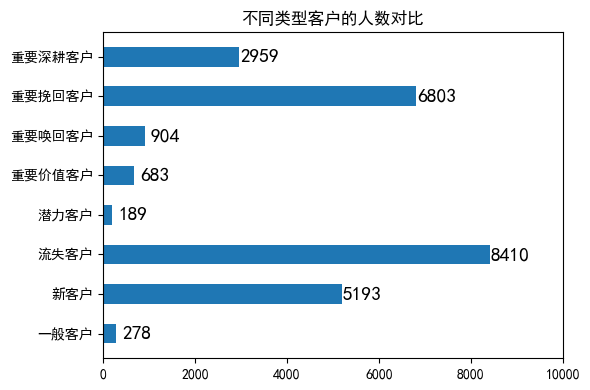

In [48]:
df3 = df2.groupby("标签").agg({"标签":"count"})
df3["不同客户的占比"] = df3["标签"].apply(lambda x:x/np.sum(df3["标签"]))
plt.figure(figsize=(6,4),dpi=100)
x = df3.index
y = df3["标签"]
plt.barh(x,height=0.5,width=y,align="center")
plt.title("不同类型客户的人数对比")

for x,y in enumerate(y):
    plt.text(y+450,x,y,ha="center",va="center",fontsize=14)
    
plt.xticks(np.arange(0,10001,2000))

plt.tight_layout()
#plt.savefig("不同类型客户的人数对比",dpi=300)

Text(0.5, 1.0, '不同类型客户人数占比图')

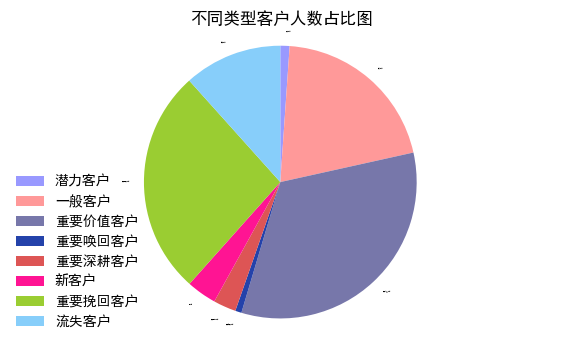

In [46]:
df3 = df2.groupby("标签").agg({"标签":"count"})
df3["不同客户的占比"] = df3["标签"].apply(lambda x:x/np.sum(df3["标签"]))
plt.figure(figsize=(7,4),dpi=100)
x = df3["不同客户的占比"]

labels = ['潜力客户', '一般客户', '重要价值客户', '重要唤回客户', '重要深耕客户', '新客户', '重要挽回客户', '流失客户']
colors = ['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555','deeppink','yellowgreen','lightskyblue']

explode = [0,0,0,0,0,0,0,0]

patches,l_text = plt.pie(x,labels=labels,colors=colors,
        explode=explode,startangle=90,counterclock=False)
for t in l_text:
    t.set_size(0)
plt.axis("equal")
plt.legend(loc=(0.001,0.001),frameon=False)

plt.title("不同类型客户人数占比图")

#plt.savefig("不同类型客户人数占比图",dpi=300)

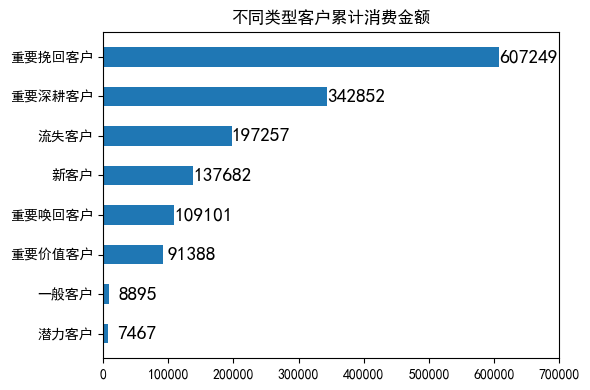

In [44]:
df3 = df2.groupby("标签").agg({"M":"sum"})
df3["M"] = df3["M"].apply(lambda x:round(x))
df3["不同客户的占比"] = df3["M"].apply(lambda x:x/np.sum(df3["M"]))
df3 = df3.sort_values(by="M",ascending=True)

plt.figure(figsize=(6,4),dpi=100)
x = df3.index
y = df3["M"]

plt.barh(x,height=0.5,width=y,align="center")
plt.title("不同类型客户累计消费金额")

for x,y in enumerate(y):
    plt.text(y+45000,x,y,ha="center",va="center",fontsize=14)

plt.xticks(np.arange(0,700001,100000))
plt.tight_layout()
#plt.savefig("不同类型客户累计消费金额",dpi=300)

Text(0.5, 1.0, '不同类型客户金额占比图')

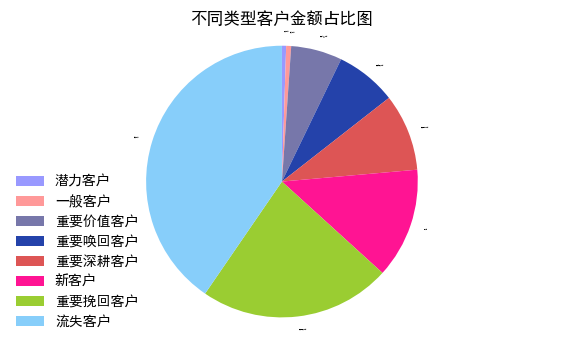

In [47]:
df3 = df2.groupby("标签").agg({"M":"sum"})
df3["M"] = df3["M"].apply(lambda x:round(x))
df3["不同客户的占比"] = df3["M"].apply(lambda x:x/np.sum(df3["M"]))
df3 = df3.sort_values(by="M",ascending=True)

plt.figure(figsize=(7,4),dpi=100)
x = df3["不同客户的占比"]

labels = ['潜力客户', '一般客户', '重要价值客户', '重要唤回客户', '重要深耕客户', '新客户', '重要挽回客户', '流失客户']
colors = ['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555','deeppink','yellowgreen','lightskyblue']

explode = [0,0,0,0,0,0,0,0]

patches,l_text= plt.pie(x,labels=labels,colors=colors,
        explode=explode,startangle=90,counterclock=False)
for t in l_text:
    t.set_size(0)
    
plt.axis("equal")
plt.legend(loc=(0.001,0.001),frameon=False)

plt.title("不同类型客户金额占比图")

#plt.savefig("不同类型客户金额占比图",dpi=300)